In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

In [2]:
# Setting
nodeCount = 20

In [3]:
nodeCount = nodeCount - nodeCount % 2
nodes = []
links = []
lastNode = chr(65+nodeCount)
for i in range (nodeCount):
    nodes.append(chr(65+i)) # 65 : A
G = nx.DiGraph()
# RING network
for i in range( nodeCount ):
    links.append( (nodes[i], nodes[(i+1)%nodeCount]) )
    links.append( (nodes[i], nodes[(i+nodeCount-1)%nodeCount]) )
# STAR network
nodes.append( lastNode )
for i in range( nodeCount ):
    links.append( (nodes[i], lastNode) )
    links.append( (lastNode, nodes[i]) )
# Implement network
G.add_nodes_from(nodes)
G.add_edges_from(links)

In [4]:
# node name
names = {}
for name in nodes:
    names[name] = name
# link name
linknames = {}
for link in links:
    linknames[link] = ''
# source-receiver (origin-destination) list
od_list = []
for i in range(nodeCount):
    od_list.append((nodes[i], nodes[int((i+nodeCount/2)%nodeCount)]))

{('A', 'B'): Text(0.639029733346443, -0.6638661866828983, ''),
 ('A', 'T'): Text(0.27865048554697935, -0.8820925530854514, ''),
 ('B', 'C'): Text(0.613752259961548, -0.5453037070783509, ''),
 ('B', 'A'): Text(0.639029733346443, -0.6638661866828983, ''),
 ('C', 'D'): Text(0.0952096532432057, -0.6430608917249269, ''),
 ('C', 'B'): Text(0.613752259961548, -0.5453037070783509, ''),
 ('D', 'E'): Text(-0.4668816762732802, -0.3276741337438989, ''),
 ('D', 'C'): Text(0.0952096532432057, -0.6430608917249269, ''),
 ('E', 'F'): Text(-0.8490562143200191, 0.037363771447848616, ''),
 ('E', 'D'): Text(-0.4668816762732802, -0.3276741337438989, ''),
 ('F', 'G'): Text(-0.9568446581132533, -0.09380547493660635, ''),
 ('F', 'E'): Text(-0.8490562143200191, 0.037363771447848616, ''),
 ('G', 'H'): Text(-0.7230491848310889, -0.3873165499151239, ''),
 ('G', 'F'): Text(-0.9568446581132533, -0.09380547493660635, ''),
 ('H', 'I'): Text(-0.48688935549353984, -0.29874916772305105, ''),
 ('H', 'G'): Text(-0.72304918

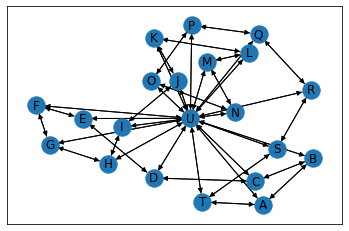

In [5]:
pos = nx.spring_layout(G, k=0.8)
nx.draw_networkx(G, pos, labels=names)
nx.draw_networkx_edge_labels(G, pos, edge_labels=linknames)

In [6]:
# 1000パケット送信したときのパケット通過数 (the number of packets passed when 1000 packets are transmitted)
od_success = {}
for od in od_list:
    od_success[ od ] = 900
print(od_success)

{('A', 'K'): 900, ('B', 'L'): 900, ('C', 'M'): 900, ('D', 'N'): 900, ('E', 'O'): 900, ('F', 'P'): 900, ('G', 'Q'): 900, ('H', 'R'): 900, ('I', 'S'): 900, ('J', 'T'): 900, ('K', 'A'): 900, ('L', 'B'): 900, ('M', 'C'): 900, ('N', 'D'): 900, ('O', 'E'): 900, ('P', 'F'): 900, ('Q', 'G'): 900, ('R', 'H'): 900, ('S', 'I'): 900, ('T', 'J'): 900}


In [7]:
# ベクトル\hat{y}をy_e2eとして作成 (generate vector \hat{y} as y_e2e)
y = np.zeros(len(od_list)) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i], od_success[od_list[i]])
    y[i] = od_success[od_list[i]]
y_e2e = -np.log(y/1000)

('A', 'K') 900
('B', 'L') 900
('C', 'M') 900
('D', 'N') 900
('E', 'O') 900
('F', 'P') 900
('G', 'Q') 900
('H', 'R') 900
('I', 'S') 900
('J', 'T') 900
('K', 'A') 900
('L', 'B') 900
('M', 'C') 900
('N', 'D') 900
('O', 'E') 900
('P', 'F') 900
('Q', 'G') 900
('R', 'H') 900
('S', 'I') 900
('T', 'J') 900


In [8]:
y

array([900., 900., 900., 900., 900., 900., 900., 900., 900., 900., 900.,
       900., 900., 900., 900., 900., 900., 900., 900., 900.])

In [9]:
y_e2e

array([0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052,
       0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052,
       0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052,
       0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052])

In [10]:
A = np.zeros((len(od_list), len(links))) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i])
    paths = list(nx.all_simple_paths(G, od_list[i][0], od_list[i][1]))
    idx = random.randint(0, len(paths)-1)
    # path = nx.shortest_path(G, od_list[i][0], od_list[i][1])
    path = paths[idx]
    print(path)
    for j in range(len(path)-1):
        k = links.index((path[j], path[j+1]))
        A[i,k] = 1

('A', 'K')
['A', 'T', 'U', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
('B', 'L')
['B', 'C', 'D', 'E', 'F', 'G', 'U', 'T', 'S', 'R', 'Q', 'P', 'O', 'N', 'M', 'L']
('C', 'M')
['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'U', 'N', 'M']
('D', 'N')
['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'U', 'B', 'A', 'T', 'S', 'R', 'Q', 'P', 'O', 'N']
('E', 'O')
['E', 'D', 'C', 'B', 'A', 'T', 'S', 'R', 'U', 'Q', 'P', 'O']
('F', 'P')
['F', 'E', 'D', 'C', 'B', 'A', 'T', 'S', 'R', 'U', 'O', 'P']
('G', 'Q')
['G', 'F', 'U', 'E', 'D', 'C', 'B', 'A', 'T', 'S', 'R', 'Q']
('H', 'R')
['H', 'G', 'F', 'U', 'B', 'A', 'T', 'S', 'R']
('I', 'S')
['I', 'H', 'G', 'F', 'E', 'D', 'U', 'R', 'S']
('J', 'T')
['J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'U', 'A', 'T']
('K', 'A')
['K', 'J', 'I', 'H', 'G', 'F', 'E', 'U', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'A']
('L', 'B')
['L', 'K', 'J', 'I', 'H', 'G', 'U', 'P', 'Q', 'R', 'S', 'T', 'A', 'B']
('M', 'C')
['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'U', 'C']
('N', 'D'

In [11]:
A

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [12]:
# 関数csを定義 (define function cs)
def cs(X, Y, alpha, positive):
    clf = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, positive=positive)
    clf.fit(X,Y)
    return clf.coef_

[0.         0.0624354  0.         0.         0.         0.
 0.03344257 0.         0.         0.03460693 0.         0.
 0.         0.         0.         0.02700167 0.         0.
 0.00810491 0.01608584 0.         0.         0.         0.
 0.         0.01790021 0.         0.04961331 0.         0.
 0.02558041 0.         0.         0.         0.03894081 0.
 0.         0.0066618  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.         0.06391031 0.         0.         0.         0.
 0.03636665 0.         0.         0.03210975 0.         0.
 0.         0.         0.         0.0277048  0.         0.
 0.00303925 0.01785905 0.       

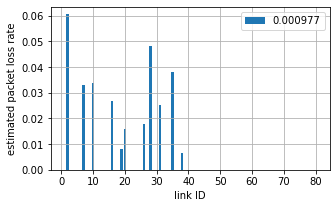

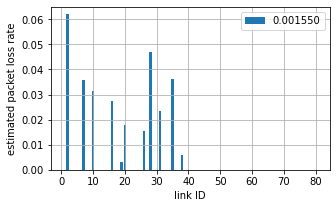

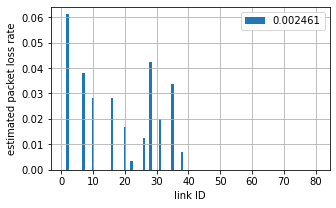

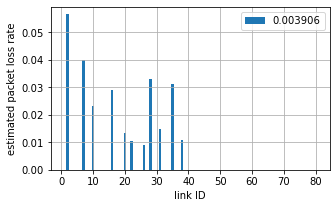

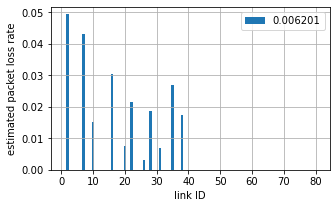

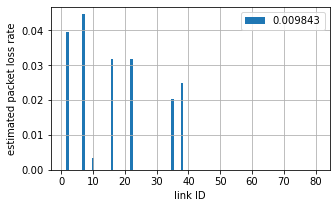

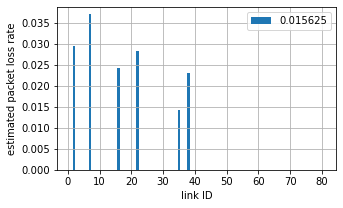

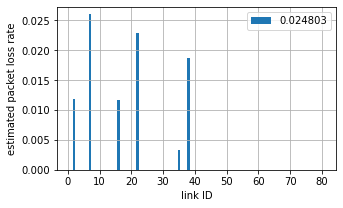

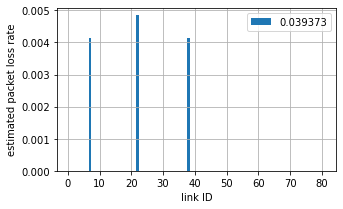

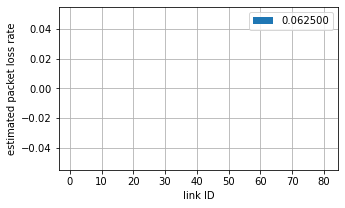

In [13]:
# csのXにAを,Yにy_e2eを代入して\hat{x}を計算.estが\hat{x} (Calculate \hat{x} by substituting A for X and y_e2e for Y in cs. est is \hat{x})
# alphaを変えて実験 (Experiment by changing alpha)
for ALPHA in np.logspace(-10, -4, 10, base=2):
    est = cs(A, y_e2e, alpha=ALPHA, positive=True)
    print(est)
    plt.figure(figsize=(5,3))
    plt.grid()
    plt.bar(range(1, len(est)+1), 1 - np.exp(-est), label='%f' %ALPHA )
    plt.legend()
    plt.xlabel('link ID')
    plt.ylabel('estimated packet loss rate')